# Final Project: Part 3 Clean

## 1. Problem Statement

Beer is the most consumed alcoholic beverage in Brazil. Brazil is the third largest beer producer in the world. Brazil is also the third largest consumer of beer in the world, after China and the United States and just in front of Germany. 

Brazil is in its worst recession yet. However, beer sales may help to drive the economy. Therefore, the main goal of this exercise is to predict the consumption of beer in one of the country's most populous cities, Sao Paulo.

## 2. Approach

### 2.1 Model Variables

The target variable I want to predict is beer consumption. Beer consumption will allow us to see how much beer was purchased in Sao Paolo. There are several variables to look at that can attribute to and predict the amount of beer consumed in a given day. They have to do with the weather conditions of a given day along with other circumstances that may affect whether an individual would consume beer. The feature variables for this model are:
 - average temperature
 - minimum temperature
 - maximum temperature
 - precipitation
 - weekend
 - month
 - season

### 2.2 Model Approach

The problem is a regression problem. Amount of beer consumed (in liters) is the target variable that I am trying to predict. I tested three different regression models for this problem. I tested a linear regression model, a decision tree model, and a random forest model. I looked at the R^2 values of the training set and the test set to determine the best model. 

## 3. Data Preparation

In [3]:
# Prepare for the notebook

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics

plt.style.use('fivethirtyeight')

In [4]:
%matplotlib inline

### 3.1 Load the data

In [5]:
# Convert commas to decimals
beer_df = pd.read_csv('Consumo_cerveja.csv', decimal=',')

### 3.2 Clean the data

In [6]:
# Translate column names to English
beer_df.columns = ['Date', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Beer_Consumption']

In [7]:
# Check column data types
beer_df.dtypes

Date                 object
Average_Temp        float64
Min_Temp            float64
Max_Temp            float64
Precipitation       float64
Weekend               int64
Beer_Consumption     object
dtype: object

In [8]:
# Convert Beer Consumption data from object to float
beer_df.loc[:, 'Beer_Consumption'] = pd.to_numeric(beer_df.loc[:, 'Beer_Consumption'])
beer_df.dtypes

Date                 object
Average_Temp        float64
Min_Temp            float64
Max_Temp            float64
Precipitation       float64
Weekend               int64
Beer_Consumption    float64
dtype: object

In [9]:
# Add month as a feature column. Extract from the date
beer_df['Month'] = pd.DatetimeIndex(beer_df['Date']).month
beer_df.head()

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption,Month
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461,1
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972,1
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814,1
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799,1
4,1/5/15,23.82,21.0,28.3,0.0,0,28.900,1


In [97]:
# Add season as a column
# Assume every 3 months is a new season 
# Seasons are opposite to what they are in North America (Brazil is in the Southern hemisphere)
    
beer_df.loc[(beer_df.Month == 12) | (beer_df.Month == 1) | (beer_df.Month == 2), 'Season'] = 'Summer'
beer_df.loc[(beer_df.Month == 3) | (beer_df.Month == 4) | (beer_df.Month == 5), 'Season'] = 'Fall'
beer_df.loc[(beer_df.Month == 6) | (beer_df.Month == 7) | (beer_df.Month == 8), 'Season'] = 'Winter'
beer_df.loc[(beer_df.Month == 9) | (beer_df.Month == 10) | (beer_df.Month == 11), 'Season'] = 'Spring'

In [98]:
beer_df.head()

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption,Month,Season
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461,1,Summer
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972,1,Summer
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814,1,Summer
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799,1,Summer
4,1/5/15,23.82,21.0,28.3,0.0,0,28.900,1,Summer


In [99]:
# Encode categorical variables as integers.
beer_df = pd.get_dummies(beer_df, columns=['Season'], drop_first=True)

In [100]:
# Check for missing values
beer_df.isna().sum()

Date                0
Average_Temp        0
Min_Temp            0
Max_Temp            0
Precipitation       0
Weekend             0
Beer_Consumption    0
Month               0
Season_Spring       0
Season_Summer       0
Season_Winter       0
dtype: int64

### 3.3 Summary of Clean Data

In [101]:
beer_df.head(20)

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption,Month,Season_Spring,Season_Summer,Season_Winter
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461,1,0,1,0
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972,1,0,1,0
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814,1,0,1,0
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799,1,0,1,0
4,1/5/15,23.82,21.0,28.3,0.0,0,28.900,1,0,1,0
5,1/6/15,23.78,20.1,30.5,12.2,0,28.218,1,0,1,0
6,1/7/15,24.00,19.5,33.7,0.0,0,29.732,1,0,1,0
7,1/8/15,24.90,19.5,32.8,48.6,0,28.397,1,0,1,0
8,1/9/15,28.20,21.9,34.0,4.4,0,24.886,1,0,1,0
9,1/10/15,26.76,22.1,34.2,0.0,1,37.937,1,0,1,0


In [102]:
beer_df.describe(include='all')

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption,Month,Season_Spring,Season_Summer,Season_Winter
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/5/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,0.249315,0.246575,0.252055
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,0.433210,0.431609,0.434789
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.000000,0.000000,0.000000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,0.000000,0.000000,0.000000
50%,NaN,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,0.000000,0.000000,0.000000
75%,NaN,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,0.000000,0.000000,1.000000


## 4. Exploratory Data Analysis

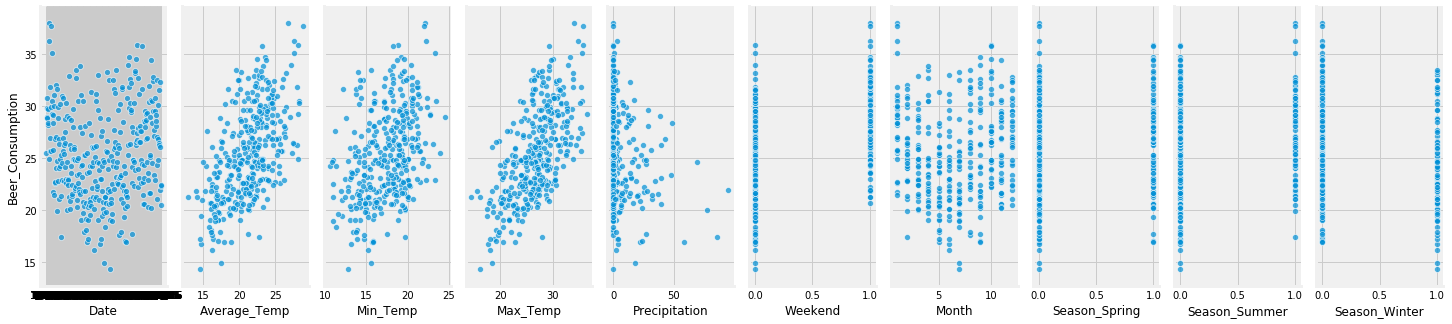

In [103]:
# See correlation of target variable (beer consumption) with feature variables with pairplot

g = sns.pairplot(data=beer_df,
                 x_vars=beer_df.drop('Beer_Consumption', axis='columns').columns,
                 y_vars=['Beer_Consumption'],
                 plot_kws={'alpha': .7},
                 height=3.5,
                )
# Make plot bigger
g.fig.set_size_inches(20,5)

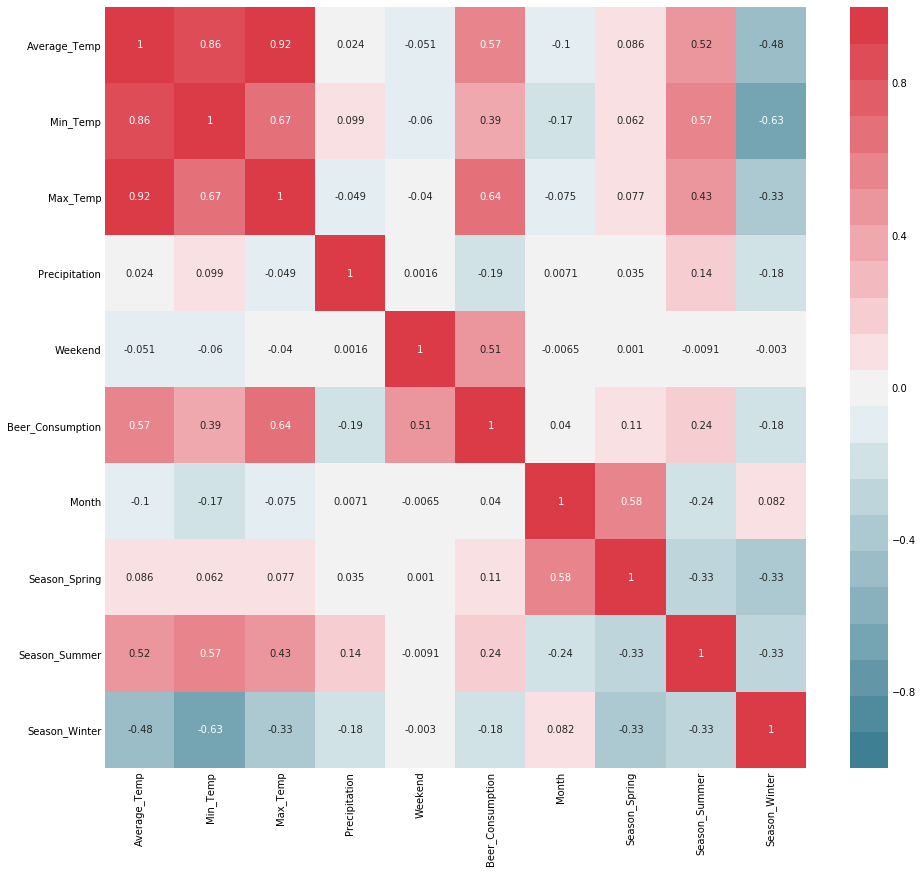

In [104]:
# Look at a heat map with correlation values to see relationship between variables, including each feature varibale with the target variable
fig,ax = plt.subplots(figsize=(14,14))
ax = sns.heatmap(beer_df.corr(), vmin = -1, vmax = 1, cmap=sns.diverging_palette(220,10,n=21), annot=True, ax=ax);

## 5. Model Building

### 5.1 Linear Regrssion Model

In [1]:
# Set X and y variables as feature variables and target variable
target_col = 'Beer_Consumption'
X_lr = beer_df.drop(['Date', 'Beer_Consumption'], axis='columns')
y_lr = beer_df.loc[:, target_col]

NameError: name 'beer_df' is not defined

In [2]:
# Perform train test split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, random_state=1)

NameError: name 'train_test_split' is not defined

In [ ]:
lr = LinearRegression()

In [24]:
# Fit the model
lr.fit(X_lr_train, y_lr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
# Score the model
# Find R-Squared value of test set
lr_test = lr.score(X_lr_test, y_lr_test)
print('R-squared value test set value:', lr_test)

# Compare R-squared value to training set
lr_training = lr.score(X_lr_train, y_lr_train)
print('R-squared training set value:', lr_training)

R-squared value test set value: 0.7244840999499342
R-squared training set value: 0.7309446756516356


In [26]:
# Find RMSE value
y_lr_pred = lr.predict(X_lr_test)
print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_lr_test, y_lr_pred)))

# Find MAE value
print('MAE value:', metrics.mean_absolute_error(y_lr_test, y_lr_pred))

RMSE value: 2.2793252618074242
MAE value: 1.8797064043728833


### 5.2 Decision Tree Model

In [61]:
# Set X and y variables as feature variables and target variable
target_col = 'Beer_Consumption'
X_dtr = beer_df.drop(['Date', 'Beer_Consumption', 'Month'], axis='columns')
y_dtr = beer_df.loc[:, target_col]

In [62]:
# Perform train test split
X_dtr_train, X_dtr_test, y_dtr_train, y_dtr_test = train_test_split(X_dtr, y_dtr, random_state=1)

In [63]:
dtr = DecisionTreeRegressor()

In [64]:
# Fit the model
dtr.fit(X_dtr_train, y_dtr_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
# Score the model
# Find R-Squared value of test set
dtr_test = dtr.score(X_dtr_test, y_dtr_test)
print('R-squared value test set value:', dtr_test)

# Compare R-squared value to training set
dtr_training = dtr.score(X_dtr_train, y_dtr_train)
print('R-squared training set value:', dtr_training)

R-squared value test set value: 0.5534507425976297
R-squared training set value: 1.0


In [67]:
# Find RMSE value
y_dtr_pred = dtr.predict(X_dtr_test)
print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_dtr_test, y_dtr_pred)))

# Find MAE value
print('MAE value:', metrics.mean_absolute_error(y_dtr_test, y_dtr_pred))

RMSE value: 2.9018012003791265
MAE value: 2.312967391304348


### 5.3 Random Forest Model

In [68]:
# Set X and y variables as feature variables and target variable
target_col = 'Beer_Consumption'
X_rfr = beer_df.drop(['Date', 'Beer_Consumption'], axis='columns')
y_rfr = beer_df.loc[:, target_col]

In [69]:
# Perform train test split
X_rfr_train, X_rfr_test, y_rfr_train, y_rfr_test = train_test_split(X_rfr, y_rfr, random_state=1)

In [73]:
rfr = RandomForestRegressor(n_estimators=310)

In [74]:
# Fit the model
rfr.fit(X_rfr_train, y_rfr_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=310, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [81]:
# Score the model
# Find R-Squared value of test set
rfr_test = rfr.score(X_rfr_test, y_rfr_test)
print('R-squared value test set value:', rfr_test)

# Compare R-squared value to training set
rfr_training = rfr.score(X_rfr_train, y_rfr_train)
print('R-squared training set value:', rfr_training)

R-squared value test set value: 0.7002085500897685
R-squared training set value: 0.9504549595596005


In [78]:
# Find RMSE value
y_rfr_pred = rfr.predict(X_rfr_test)
print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_rfr_test, y_rfr_pred)))

# Find MAE value
print('MAE value:', metrics.mean_absolute_error(y_rfr_test, y_rfr_pred))

RMSE value: 2.3776208008073296
MAE value: 1.9444327138849937


## 6. Model Evaluation

In [84]:
#Create a results summary table
model_type = ['Linear', 'Decision Tree', 'Random Forest']
training_results = [lr_training, dtr_training, rfr_training]
test_results = [lr_test, dtr_test, rfr_test]

results_df = pd.DataFrame({'Model':model_type, 'Training Results':training_results, 'Test Results':test_results})
results_df

,Model,Training Results,Test Results
0,Linear,0.730945,0.724484
1,Decision Tree,1.000000,0.553451
2,Random Forest,0.950455,0.700209


None of these models are perfect. The training set of the decision tree model and the random forest model have high accuracy but the test set of both models do not have high accuracy, which indicates varaince. The training and test set of the linear model are similar but still has some bias.  